# Entanglement Classifier Trial Notebook

### Importing Dependencies

In [1]:
import numpy as np

from components.system import System
from components.connection import ConnectionFactory, Connection
from components.model import Model
from components.connection_functions import DrivenCascadeFunction, EnergyExchangeFunction

### Setting up the system

In [2]:
reservoir_nodes=3
system_nodes=1

In [3]:
"""
Defining System setup
"""

system_state = np.array([[1, 0], [0, 0]])
system_node_list = [0]

if len(system_node_list) != system_nodes:
    raise Exception

system_connections = {}

system = System(
    init_quantum_state=system_state, nodes=system_node_list, connections=system_connections
)

### Setting up the interface

In [4]:

"""
Defining Interface setup
"""

interfaceFactory = ConnectionFactory(DrivenCascadeFunction, gamma_1=10, gamma_2=10)

### Setting up the reservoir

In [5]:
"""
Defining Reservoir setup
"""

reservoirFactory = ConnectionFactory(EnergyExchangeFunction, is_hamiltonian=True, J=[8,12])

### Setting up the model

In [6]:
model = Model()
model.setSystem(system)
model.setReservoirConnectionFac(reservoirFactory)
model.setInterfaceConectionFac(interfaceFactory)
model.generateReservoir(reservoir_nodes, init_quantum_state=0)
model.generateInterface(connection_rate=0.5)
model.setRunDuration(1)
model.setRunResolution(0.001)


### Running the model

In [7]:
model.run()

In [8]:
log = model.modelLog

### Plotting results

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


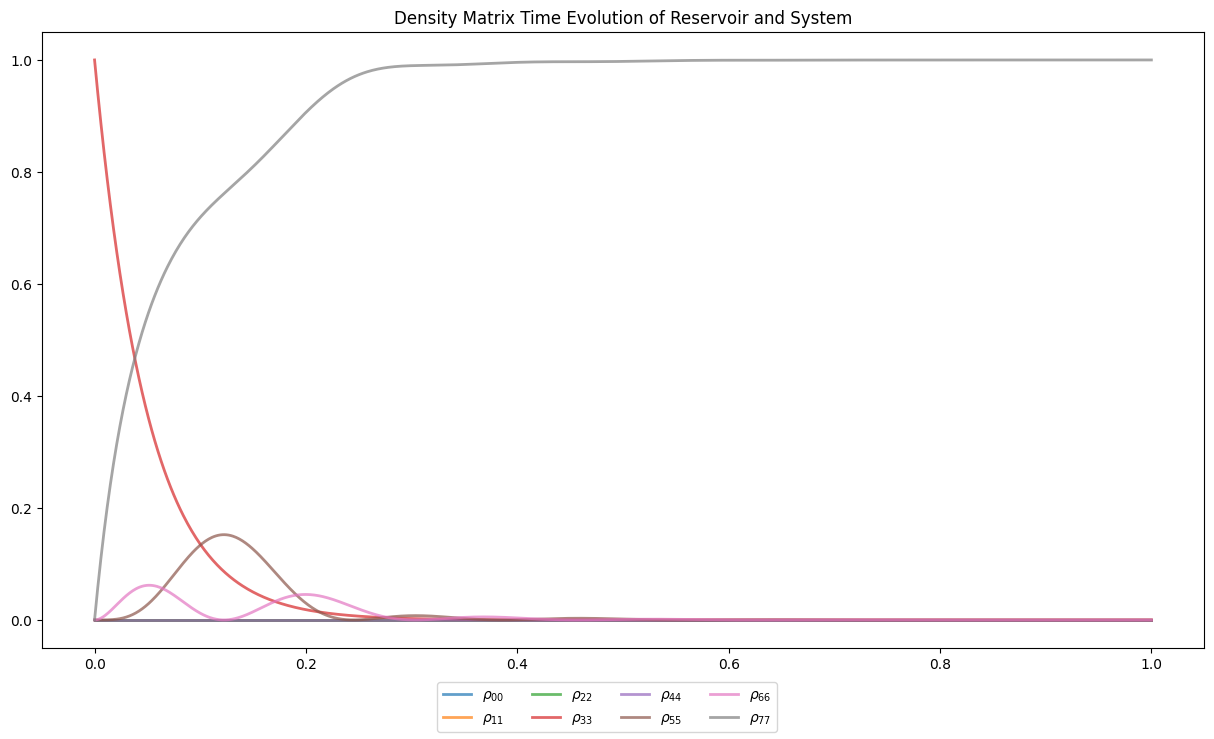

In [9]:
log.plotResAndSys()

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


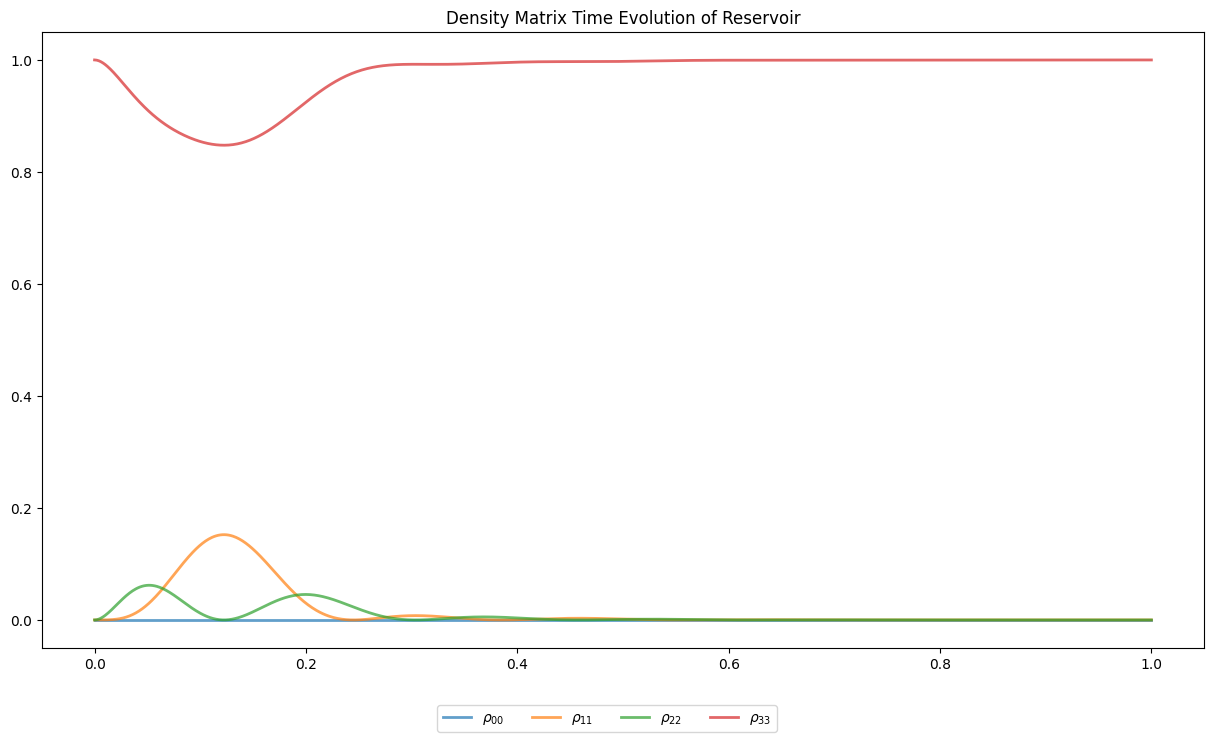

In [11]:
log.plotRes()

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


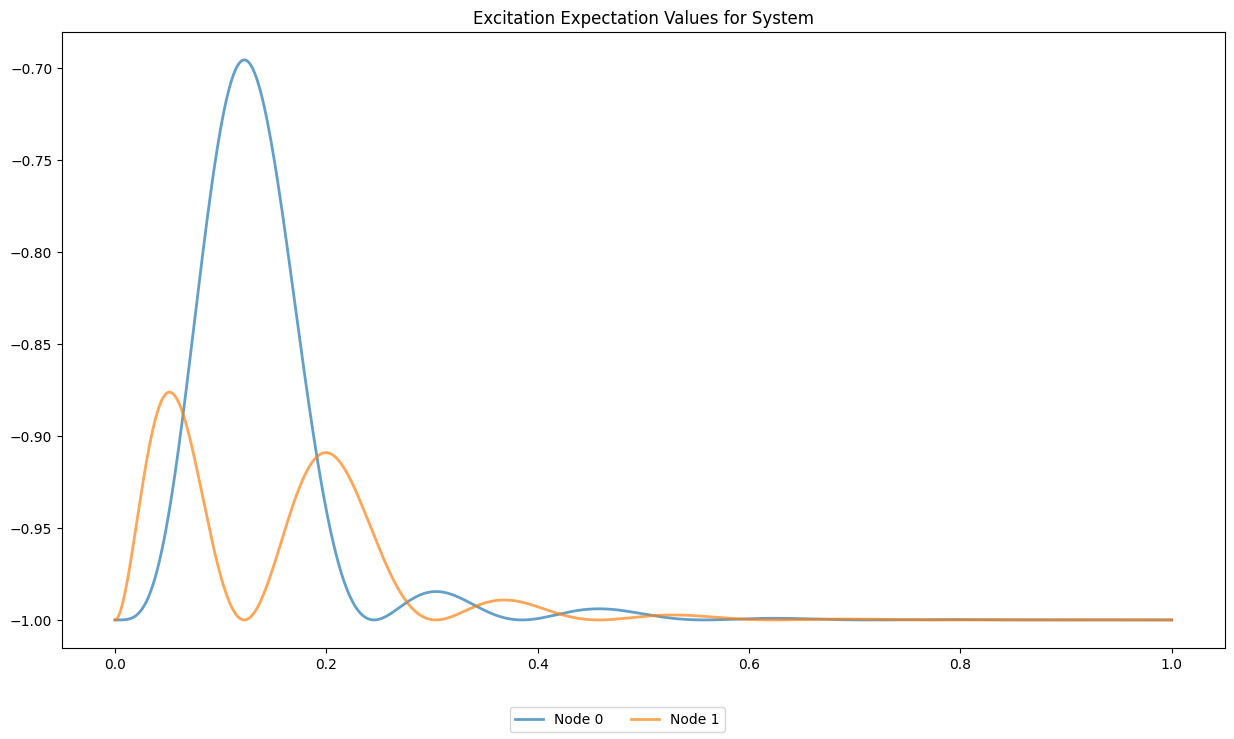

In [12]:
log.plotExcite()

In [18]:
log.excitation_fig[0].savefig(r"C:\Users\mmack\OneDrive\Documents\Queens\AMA4004\excitation_evolution.png")